# Processing collected sensor data

## Imports

In [52]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Configure matplotlib to show figures embedded in the notebook
%matplotlib inline

## Utilities

In [57]:
# Constants
NUM_SENSORS = 5

sensr_dir = 'raw_sensor_data/'
proc_sensr_dir = 'proc_sensor_data/'

hdpron_dir = 'hdpron/'
hdsup_dir = 'hdsup/'
heeldom_dir = 'heeldom/'
normal_dir = 'normal/'
heellift_dir = 'heellift/'
hlpron_dir = 'hlpron/'
hlsup_dir = 'hlsup/'
pron_dir = 'pron/'
sup_dir = 'sup/'
testing = 'testing/'

classes = {'hlpron': 0, 
           'hlsup': 1, 
           'sup': 2,
           'heellift': 3,
           'pron': 4, 
           'heeldom': 5,
           'hdpron': 6,
           'hdsup': 7,
           'normal': 8}

classes_inv = {0:'hlpron', 
               1:'hlsup', 
               2:'sup',
               3:'heellift',
               4:'pron',
               5: 'heeldom',
               6: 'hdpron',
               7: 'hdsup',
               8: 'normal'}

# data: an N by num_sensors matrix, where N number of readings
# returns a list of length num_sensors, each is an array of shape (N,)
# h: smoothing filter
def preprocess_sensor_data(data, num_sensors, h):
    return np.apply_along_axis(lambda row: np.convolve(row, h, mode='valid'), axis=0, arr=data)

# expects array-like data
def create_feature_vectors(data, offset=5):
    N, M = data.shape
    idx = 0
    X_t = []
    while idx + offset <= N:
        X_t.append(data[idx:idx+offset].flatten(order='F'))
        idx += offset
    return np.array(X_t)

def chained(sequences):
    for seq in sequences:
        yield from seq

def concatenate(sequences):
    sequences = iter(sequences)
    first = next(sequences)
    if hasattr(first, 'join'):
        return first + ''.join(sequences)
    return first + type(first)(chained(sequences))

def plot_and_save_data(input_files, input_cat):
    idx = 0
    for fn in input_files.keys():
        sensor_data = np.genfromtxt(sensr_dir + input_cat + '/' + fn, delimiter=',')
        sensor_data = sensor_data[input_files[fn][0]:input_files[fn][1]]
        np.save(proc_sensr_dir + input_cat + '/' + input_cat + '_' + str(idx), sensor_data)
        idx+=1
        plt.figure()
        plt.title(fn)
        plt.plot(sensor_data)
        plt.show()

## Heeldom Pron

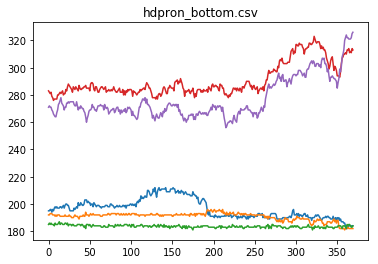

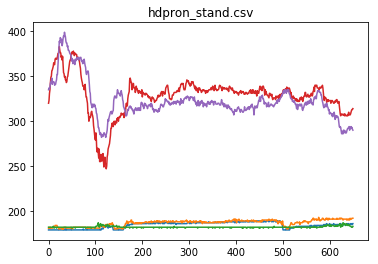

In [58]:
input_files = {'hdpron_bottom.csv': (0, 370),
               'hdpron_stand.csv': (1100, 1750)}

plot_and_save_data(input_files, 'hdpron')

## Heeldom Sup

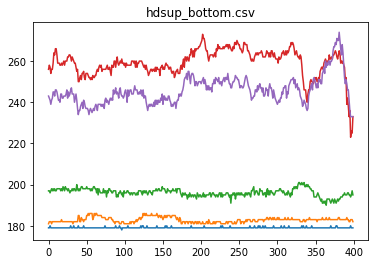

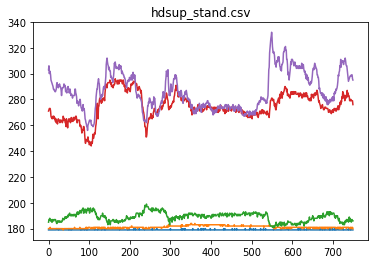

In [60]:
key = 'hdsup'

input_files = {'hdsup_bottom.csv': (0, 400),
               'hdsup_stand.csv': (750, 1500)}

plot_and_save_data(input_files, 'hdsup')

## Heeldom

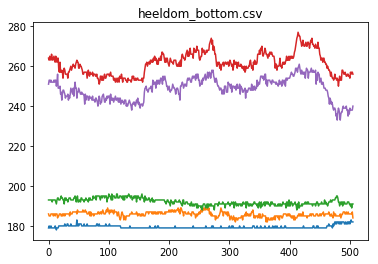

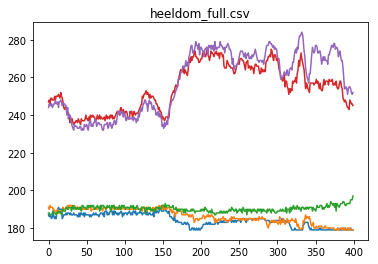

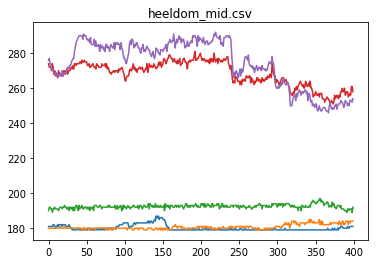

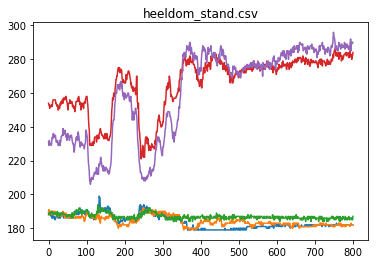

In [61]:
key = 'heeldom'

input_files = {'heeldom_bottom.csv': (0, -1),
               'heeldom_full.csv': (0, 400),
               'heeldom_mid.csv': (0, 400),
               'heeldom_stand.csv': (600, 1400)}

plot_and_save_data(input_files, 'heeldom')

## Normal

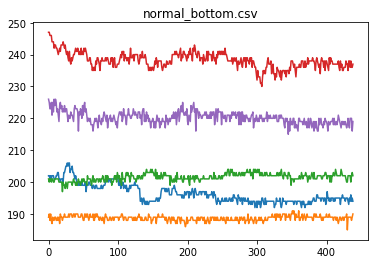

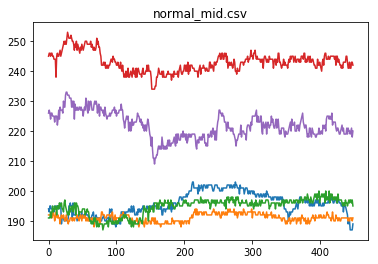

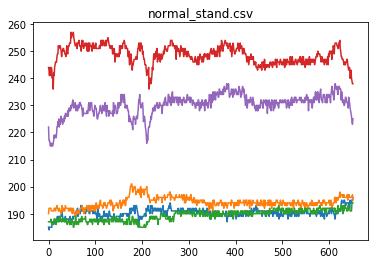

In [62]:
input_files = {'normal_bottom.csv': (0, -1),
               'normal_mid.csv': (0, -1),
               'normal_stand.csv': (250, -1)}

plot_and_save_data(input_files, 'normal')

## Heellift

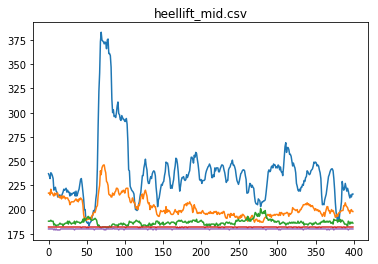

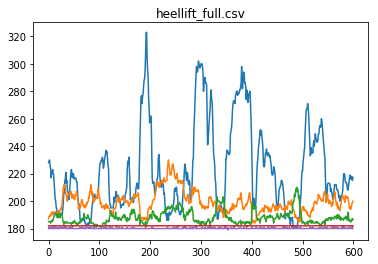

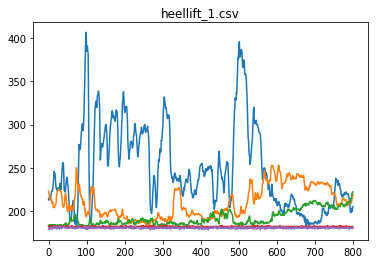

In [63]:
input_files = {'heellift_mid.csv': (0, 400),
               #'heellift_stand.csv': (0, -1),
               'heellift_full.csv': (400, 1000),
               'heellift_1.csv': (300, 1100)}

plot_and_save_data(input_files, 'heellift')

## Heellift-Pron

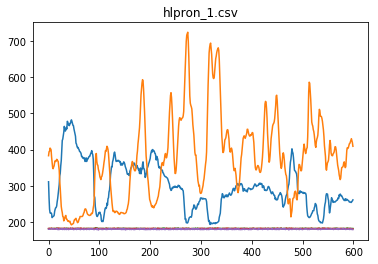

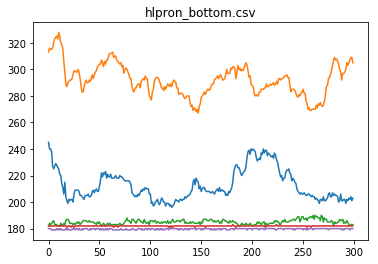

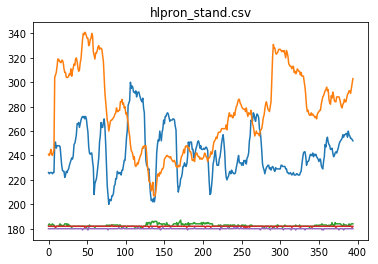

In [64]:
input_files = {'hlpron_1.csv': (400, 1000),
               'hlpron_bottom.csv': (0, 300),
               'hlpron_stand.csv': (0, -1)}

plot_and_save_data(input_files, 'hlpron')

## Heellift-Sup

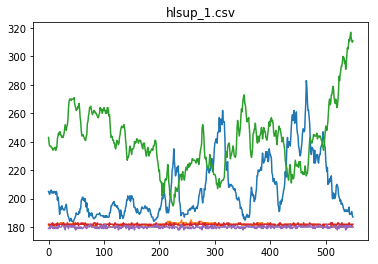

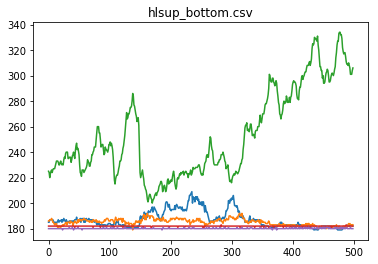

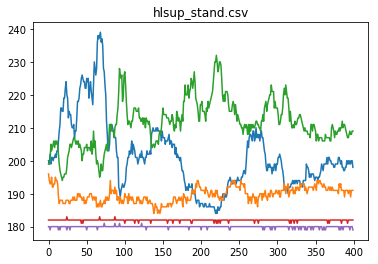

In [65]:
input_files = {'hlsup_1.csv': (200, 750),
               'hlsup_bottom.csv': (600, 1100),
               'hlsup_stand.csv': (400, 800)}

plot_and_save_data(input_files, 'hlsup')

## Pronation

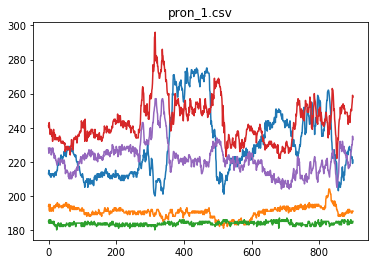

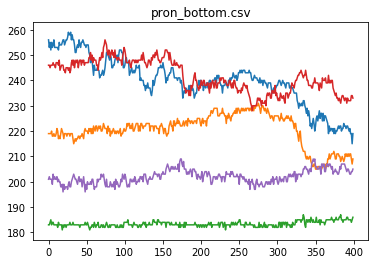

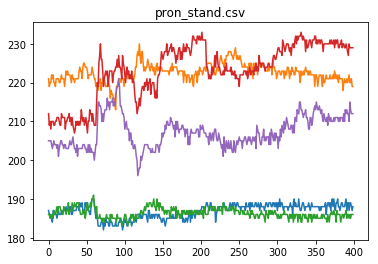

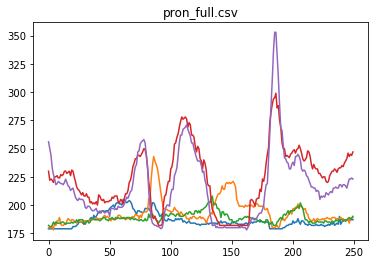

In [66]:
input_files = {'pron_1.csv': (200, 1100),
               'pron_bottom.csv': (0, 400),
               #'pron_mid.csv': (0, -1),
               'pron_stand.csv': (400, 800),
               'pron_full.csv': (250, 500)}

plot_and_save_data(input_files, 'pron')

## Supination

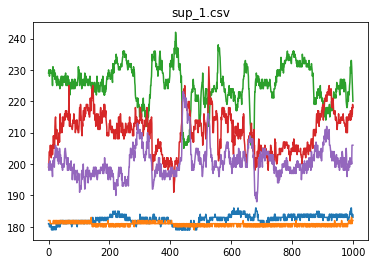

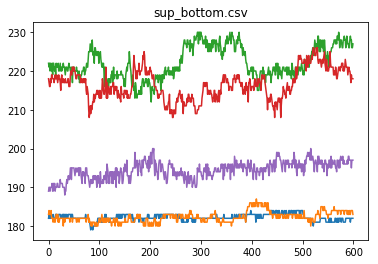

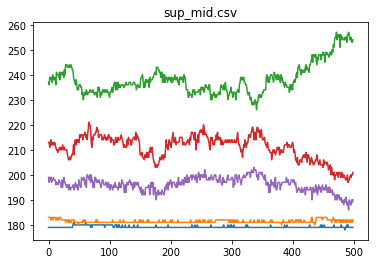

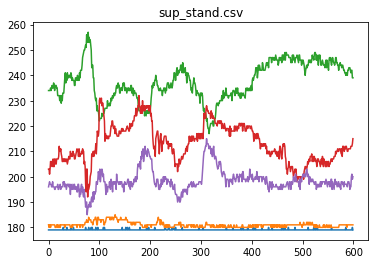

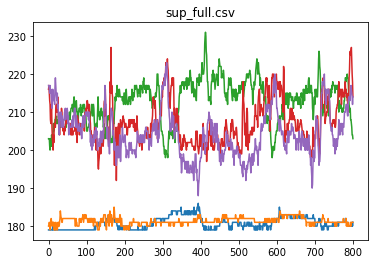

In [67]:
input_files = {'sup_1.csv': (400, 1400),
               'sup_bottom.csv': (0, 600),
               'sup_mid.csv': (200, 700),
               'sup_stand.csv': (800, 1400),
               'sup_full.csv': (200, 1000)}

plot_and_save_data(input_files, 'sup')